# Importing Datasets from Scikit-Learn

This post talks about importing datasets from [Scikit-Learn](https://scikit-learn.org/).

Let's import the `datasets` package. Also, we import NumPy to use the `np.unique()` function and others later.

In [5]:
from sklearn import datasets
import numpy as np

By running `dir(datasets)`, we see all the functions associated with this package. 

In [6]:
print(*[data for data in dir(datasets) if not data.startswith('_')])

clear_data_home dump_svmlight_file fetch_20newsgroups fetch_20newsgroups_vectorized fetch_california_housing fetch_covtype fetch_kddcup99 fetch_lfw_pairs fetch_lfw_people fetch_olivetti_faces fetch_openml fetch_rcv1 fetch_species_distributions get_data_home load_boston load_breast_cancer load_diabetes load_digits load_files load_iris load_linnerud load_sample_image load_sample_images load_svmlight_file load_svmlight_files load_wine make_biclusters make_blobs make_checkerboard make_circles make_classification make_friedman1 make_friedman2 make_friedman3 make_gaussian_quantiles make_hastie_10_2 make_low_rank_matrix make_moons make_multilabel_classification make_regression make_s_curve make_sparse_coded_signal make_sparse_spd_matrix make_sparse_uncorrelated make_spd_matrix make_swiss_roll


You can use the datasets prefixed with `load` to load small, standard datasets, otherwise known as toy datasets. On the other hand, you can use the datasets prefixed with the word `fetch` to download and load larger datasets more similar to real-world datasets. 

Loaders and fetchers return a [Bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html?highlight=bunch#sklearn.utils.Bunch) object, a dictionary that exposes its keys as attributes.

The functions prefixed with `make` are the dataset generation functions. We use these to create controlled, synthetic datasets. The functions return a tuple `(X, y)` consisting of a `n_samples` * `n_features` NumPy array `X` and an array of length `n_samples` containing the targets `y`.

Finally, we can download datasets from the [openml.org](https://openml.org/) repository. [Openml.org](https://openml.org/) is a public repository for machine learning that allows one to upload open datasets.

Say we were interested in downloading a dataset of the gene expressions in mice brains. We need to provide a name and a version to fully specify a dataset, though the version argument is optional.

In [9]:
from sklearn.datasets import fetch_openml
mice = fetch_openml(name='miceprotein', version=4)

Let's learn more about this dataset.

In [44]:
print('---------------')
print('Description')
print('---------------')
print(mice.DESCR)
print('---------------')
print('Feature Names')
print('---------------')
print(mice.feature_names)
print('---------------')
print('Target Names')
print('---------------')
print(mice.target_names)
print('---------------')
print('Data')
print('---------------')
print(mice.data)
print('---------------')
print('Details')
print('---------------')
print(mice.details)
print('---------------')
print('URL')
print('---------------')
print(mice.url)

---------------
Description
---------------
**Author**: Clara Higuera, Katheleen J. Gardiner, Krzysztof J. Cios  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression) - 2015   
**Please cite**: Higuera C, Gardiner KJ, Cios KJ (2015) Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model of Down Syndrome. PLoS ONE 10(6): e0129126.

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mi

We see below that the dataset contains 1,080 examples belonging to 8 different classes. The `np.unique()` function finds the unique elements in an array and returns these elements sorted.


In [11]:
print(f'Shape of features: {mice.data.shape}')
print(f'Shape of target: {mice.target.shape}')
print(f'Unique Targets: {np.unique(mice.target)}')
print(f'Total targets: {len(np.unique(mice.target))}')

Shape of features: (1080, 77)
Shape of target: (1080,)
Unique Targets: ['c-CS-m' 'c-CS-s' 'c-SC-m' 'c-SC-s' 't-CS-m' 't-CS-s' 't-SC-m' 't-SC-s']
Total targets: 8


`np.unique()` contains three optional outputs in addition to the unique elements:

* **unique_indices**: the indices of the first occurrences of the unique values in the original array
  * only provided if *return_index* is True
* **unique_inverse**: the indices to reconstruct the original array from the unique array
  * only provided if *return_inverse* is True
* **unique_counts**: the number of times each of the unique values comes up in the original array.
  * only provided if *return_counts* is True

We set the `return_counts` argument of the `np.unique()` function to `True` to get the number of occurrences per target variable. `np.column_stack(*tup*)` accepts a `tuple` as an argument and stacks 1-D arrays as columns into a 2-D array.

In [19]:
unique, counts = np.unique(mice.target, return_counts=True)
print(f'Unique pre-column stack: {unique}')
print(f'Counts pre-column stack: {counts}')
print(f'Unique shape: {unique.shape}')
print(f'Counts shape: {counts.shape}')
print(np.column_stack((unique, counts)))
print(f'Stack shape: {np.column_stack((unique, counts)).shape}')

Unique pre-column stack: ['c-CS-m' 'c-CS-s' 'c-SC-m' 'c-SC-s' 't-CS-m' 't-CS-s' 't-SC-m' 't-SC-s']
Counts pre-column stack: [150 135 150 135 135 105 135 135]
Unique shape: (8,)
Counts shape: (8,)
[['c-CS-m' 150]
 ['c-CS-s' 135]
 ['c-SC-m' 150]
 ['c-SC-s' 135]
 ['t-CS-m' 135]
 ['t-CS-s' 105]
 ['t-SC-m' 135]
 ['t-SC-s' 135]]
Stack shape: (8, 2)


Using this shape, we can use `matplotlib` to plot a bar graph of the counts per target variable occurrence.

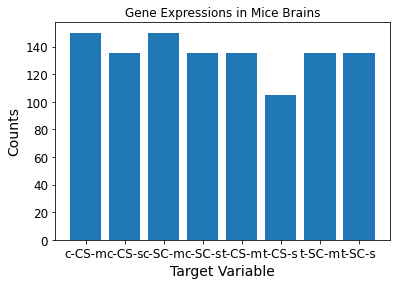

In [45]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.bar(unique, counts)
plt.title("Gene Expressions in Mice Brains")
plt.xlabel("Target Variable")
plt.ylabel("Counts")
plt.show()

There's a lot more to do, and this introductory post only touches the tip of the iceberg.